1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

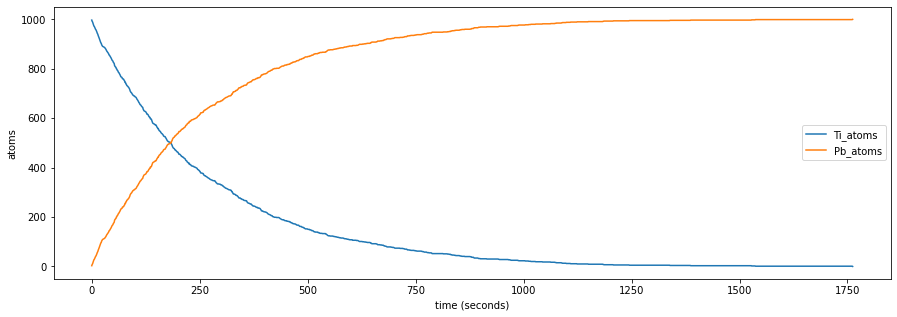

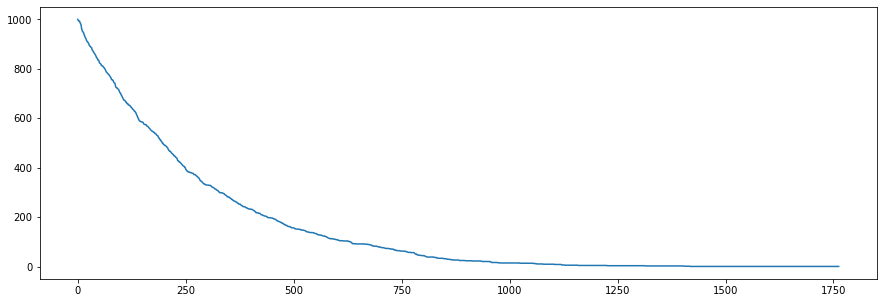

In [66]:
Ti_hl = 3.052*60
atoms = 1000

def p1(t):
    return 1.-2**(-t/Ti_hl)

Ti_atoms = []
t = 0
while(atoms > 0): 
    prob = p1(1)
    decayed_atoms = sum(np.random.uniform(0, 1, atoms) < pr)
    atoms -= decayed_atoms
    Ti_atoms.append(atoms)
    t +=1
    
Pb_atoms = [1000 - a for a in Ti_atoms]
t = range(t)
fig = plt.figure(figsize=(15,5))
plt.plot(t, Ti_atoms , label = 'Ti_atoms')
plt.plot(t, Pb_atoms , label = 'Pb_atoms')
plt.legend()
plt.xlabel('time (seconds)')
plt.ylabel('atoms')



def p2(t):
    return -Ti_hl*np.log2(1-x)


x = np.random.random(1000)
td = p2(x)

Ti_atoms = []
for i in t:
    Ti_atoms.append(np.sum(td > i))

fig = plt.figure(figsize=(15,5))
plt.plot(Ti_atoms)



2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

hit/miss integral results for 20 repeatations:
Mean value: 1.3475
Std: 0.007300821871542967
Max value: 1.3632
Min value: 1.331

mean value integral results for 20 repeatations:
Mean value: 1.3463187460473494
Std: 0.006155423651632961
Max value: 1.361433027011483
Min value: 1.3351649474773581


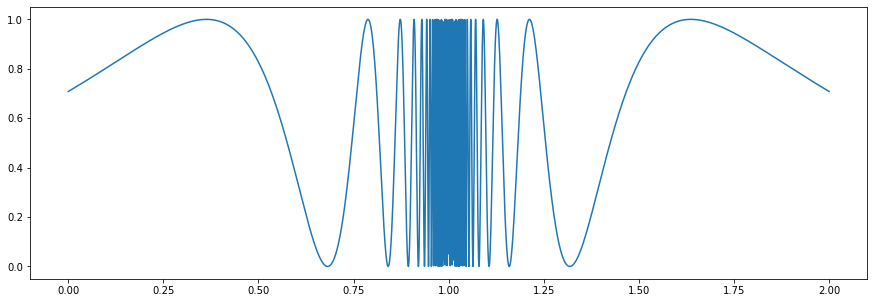

In [85]:
def f(x):
    return (np.sin(1/(1-x)))**2

N = 10000

x = np.linspace(0, 2, N)
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(x, f(x))



hm = []
iterate = 20


for i in range(iterate):
    count=0
    for n in range(N):
        x = np.random.uniform(0, 2) 
        y = np.random.random()     
        if y < f(x): count += 1
    hm.append(2 * count / N)

hm = np.array(hm)

print(f"hit/miss integral results for {iterate} repeatations:")
print(f"Mean value: {hm.mean()}")
print(f"Std: {hm.std()}")
print(f"Max value: {hm.max()}")
print(f"Min value: {hm.min()}")





mm = []
err_mm = []
for i in range(iterate):
    rand_f = np.array([f(np.random.uniform(0, 2)) for i in range(N)])
    mm.append((2/N)*np.sum(rand_f))
    err_mm.append((2/np.sqrt(N))*np.sqrt(np.var(rand_f)))
    
mm = np.array(mm)
print(f"\nmean value integral results for {iterate} repeatations:")
print(f"Mean value: {mm.mean()}")
print(f"Std: {mm.std()}")
print(f"Max value: {mm.max()}")
print(f"Min value: {mm.min()}")



3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [103]:
def f(x):
    if sum(x**2) <=1:
        return 1
    return 0

def hm_D(D, N, iterate):

    hm = []
    for j in range(iterate):
        count = 0
        for i in range(N):
            x = np.random.random(D)
            count += f(x)
        hm.append(4*count/N)

        
    hm = np.array(hm)
    print(f"\nhit/miss integral results for {iterate} repeatations for {D}D sphere/circle :")
    print(f"Mean value: {hm.mean()}")
    print(f"Std: {hm.std()}")
    print(f"Max value: {hm.max()}")
    print(f"Min value: {hm.min()}")



N=10000
iterate = 15
D = 2
hm_D(D, N, iterate)
D = 10
hm_D(D, N, iterate)


hit/miss integral results for 15 repeatations for 2D sphere/circle :
Mean value: 3.150453333333333
Std: 0.015386828422026677
Max value: 3.1864
Min value: 3.1308

hit/miss integral results for 15 repeatations for 10D sphere/circle :
Mean value: 0.010106666666666665
Std: 0.0018731316617425005
Max value: 0.014
Min value: 0.0064


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [109]:
def f(x):
     return x**(-1/2)/(np.exp(x)+1)

def w(x):
    return 1/x**0.5

def is_N( N, iterate):

    is_N = []
    for i in range(iterate):
        x = np.random.random(N)
        is_N.append(2 / n * np.sum(f(x) / w(x)))

        
    is_N = np.array(is_N)
    print(f"\nimportance sampling integral results for {iterate} repeatations:")
    print(f"Mean value: {is_N.mean()}")
    print(f"Std: {is_N.std()}")
    print(f"Max value: {is_N.max()}")
    print(f"Min value: {is_N.min()}")

N=10000
iterate = 15
is_N(N, iterate)






importance sampling integral results for 15 repeatations:
Mean value: 0.760141028031107
Std: 0.0011588468495809876
Max value: 0.7622086702845032
Min value: 0.7580692544132362
